In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import climate_learn as cl





# Importing the dataset :

In [134]:
df = pd.read_csv("basel.csv")

df.columns = df.iloc[3]

df.drop([1,2,3, 4, 5, 6, 7, 8, 0], inplace=True)
df

/tmp/ipykernel_422185/2685420099.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("basel.csv")


3,variable,Temperature,Precipitation Total,Snowfall Amount,Wind Speed,Wind Direction,Wind Speed,Wind Direction,Cloud Cover Total,Mean Sea Level Pressure
9,20100101T0000,3.8402452,0.0,0.0,3.219938,153.43495,10.787993,205.70996,31.0,992.2
10,20100101T0100,3.1102452,0.0,0.0,2.0364676,135.0,9.449572,197.74467,34.0,991.9
11,20100101T0200,3.0002456,0.0,0.0,2.0991426,120.96376,7.9932976,187.76517,31.0,991.7
12,20100101T0300,3.0002456,0.0,0.0,2.5959969,123.69006,7.5685663,177.27368,29.400002,991.0
13,20100101T0400,2.8302455,0.0,0.0,1.609969,116.56505,5.937272,165.96376,29.1,990.7
...,...,...,...,...,...,...,...,...,...,...
122740,20240101T1900,5.420245,0.0,0.0,7.928178,182.60257,47.43538,237.39542,30.000002,1016.3
122741,20240101T2000,5.110245,0.0,0.0,8.64,180.0,52.64623,234.46233,30.000002,1016.2
122742,20240101T2100,5.310245,0.0,0.0,8.647496,177.61406,56.335114,231.22583,30.000002,1015.1
122743,20240101T2200,5.600245,0.0,0.0,10.086427,177.95459,61.06114,233.87329,56.0,1014.5


In [135]:
df = df.rename(columns={'variable': 'Time'})
df["Time"] = pd.to_datetime(df['Time'])
df

3,Time,Temperature,Precipitation Total,Snowfall Amount,Wind Speed,Wind Direction,Wind Speed,Wind Direction,Cloud Cover Total,Mean Sea Level Pressure
9,2010-01-01 00:00:00,3.8402452,0.0,0.0,3.219938,153.43495,10.787993,205.70996,31.0,992.2
10,2010-01-01 01:00:00,3.1102452,0.0,0.0,2.0364676,135.0,9.449572,197.74467,34.0,991.9
11,2010-01-01 02:00:00,3.0002456,0.0,0.0,2.0991426,120.96376,7.9932976,187.76517,31.0,991.7
12,2010-01-01 03:00:00,3.0002456,0.0,0.0,2.5959969,123.69006,7.5685663,177.27368,29.400002,991.0
13,2010-01-01 04:00:00,2.8302455,0.0,0.0,1.609969,116.56505,5.937272,165.96376,29.1,990.7
...,...,...,...,...,...,...,...,...,...,...
122740,2024-01-01 19:00:00,5.420245,0.0,0.0,7.928178,182.60257,47.43538,237.39542,30.000002,1016.3
122741,2024-01-01 20:00:00,5.110245,0.0,0.0,8.64,180.0,52.64623,234.46233,30.000002,1016.2
122742,2024-01-01 21:00:00,5.310245,0.0,0.0,8.647496,177.61406,56.335114,231.22583,30.000002,1015.1
122743,2024-01-01 22:00:00,5.600245,0.0,0.0,10.086427,177.95459,61.06114,233.87329,56.0,1014.5


In [136]:
df.to_csv('era5.csv', index=False)
pre_df = pd.read_csv("era5.csv")
pre_df

,Time,Temperature,Precipitation Total,Snowfall Amount,Wind Speed,Wind Direction,Wind Speed.1,Wind Direction.1,Cloud Cover Total,Mean Sea Level Pressure
0,2010-01-01 00:00:00,3.840245,0.0,0.0,3.219938,153.43495,10.787993,205.70996,31.000000,992.2
1,2010-01-01 01:00:00,3.110245,0.0,0.0,2.036468,135.00000,9.449572,197.74467,34.000000,991.9
2,2010-01-01 02:00:00,3.000246,0.0,0.0,2.099143,120.96376,7.993298,187.76517,31.000000,991.7
3,2010-01-01 03:00:00,3.000246,0.0,0.0,2.595997,123.69006,7.568566,177.27368,29.400002,991.0
4,2010-01-01 04:00:00,2.830246,0.0,0.0,1.609969,116.56505,5.937272,165.96376,29.100000,990.7
...,...,...,...,...,...,...,...,...,...,...
122731,2024-01-01 19:00:00,5.420245,0.0,0.0,7.928178,182.60257,47.435380,237.39542,30.000002,1016.3
122732,2024-01-01 20:00:00,5.110245,0.0,0.0,8.640000,180.00000,52.646230,234.46233,30.000002,1016.2
122733,2024-01-01 21:00:00,5.310245,0.0,0.0,8.647496,177.61406,56.335114,231.22583,30.000002,1015.1
122734,2024-01-01 22:00:00,5.600245,0.0,0.0,10.086427,177.95459,61.061140,233.87329,56.000000,1014.5


In [155]:
pre_df.index = pre_df["Time"]
pre_df.drop(columns=["Time"], inplace=True)
pre_df

,Temperature,Precipitation Total,Snowfall Amount,Wind Speed,Wind Direction,Wind Speed.1,Wind Direction.1,Cloud Cover Total,Mean Sea Level Pressure
Time,,,,,,,,,
2010-01-01 00:00:00,3.840245,0.0,0.0,3.219938,153.43495,10.787993,205.70996,31.000000,992.2
2010-01-01 01:00:00,3.110245,0.0,0.0,2.036468,135.00000,9.449572,197.74467,34.000000,991.9
2010-01-01 02:00:00,3.000246,0.0,0.0,2.099143,120.96376,7.993298,187.76517,31.000000,991.7
2010-01-01 03:00:00,3.000246,0.0,0.0,2.595997,123.69006,7.568566,177.27368,29.400002,991.0
2010-01-01 04:00:00,2.830246,0.0,0.0,1.609969,116.56505,5.937272,165.96376,29.100000,990.7
...,...,...,...,...,...,...,...,...,...
2024-01-01 19:00:00,5.420245,0.0,0.0,7.928178,182.60257,47.435380,237.39542,30.000002,1016.3
2024-01-01 20:00:00,5.110245,0.0,0.0,8.640000,180.00000,52.646230,234.46233,30.000002,1016.2
2024-01-01 21:00:00,5.310245,0.0,0.0,8.647496,177.61406,56.335114,231.22583,30.000002,1015.1


In [156]:
pre_df.describe()

3,Time,Temperature,Precipitation Total,Snowfall Amount
count,122727,122736.000000,122736.000000,122736.000000
mean,2017-01-01 03:59:59.735999488,11.669351,0.101950,0.004306
min,2010-01-01 00:00:00,-15.959755,0.000000,0.000000
25%,2013-07-02 18:30:00,5.430245,0.000000,0.000000
50%,2017-01-01 04:00:00,11.280245,0.000000,0.000000
75%,2020-07-02 13:30:00,17.450245,0.000000,0.000000
max,2024-01-01 23:00:00,38.570248,8.500000,1.190000
std,NaN,8.197254,0.319219,0.037004


In [157]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122736 entries, 2010-01-01 00:00:00 to 2024-01-01 23:00:00
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature              122736 non-null  float64
 1   Precipitation Total      122736 non-null  float64
 2   Snowfall Amount          122736 non-null  float64
 3   Wind Speed               122736 non-null  float64
 4   Wind Direction           122736 non-null  float64
 5   Wind Speed.1             122736 non-null  float64
 6   Wind Direction.1         122736 non-null  float64
 7   Cloud Cover Total        122736 non-null  float64
 8   Mean Sea Level Pressure  122736 non-null  float64
dtypes: float64(9)
memory usage: 9.4+ MB


In [158]:
for i in range(9):
  pre_df.iloc[i+1] = pre_df.iloc[i+1].apply(pd.to_numeric, errors='coerce')

pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122736 entries, 2010-01-01 00:00:00 to 2024-01-01 23:00:00
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature              122736 non-null  float64
 1   Precipitation Total      122736 non-null  float64
 2   Snowfall Amount          122736 non-null  float64
 3   Wind Speed               122736 non-null  float64
 4   Wind Direction           122736 non-null  float64
 5   Wind Speed.1             122736 non-null  float64
 6   Wind Direction.1         122736 non-null  float64
 7   Cloud Cover Total        122736 non-null  float64
 8   Mean Sea Level Pressure  122736 non-null  float64
dtypes: float64(9)
memory usage: 9.4+ MB


In [159]:
df.isna().sum()

3
Time                       9
Temperature                0
Precipitation Total        0
Snowfall Amount            0
Wind Speed                 0
Wind Direction             0
Wind Speed                 0
Wind Direction             0
Cloud Cover Total          0
Mean Sea Level Pressure    0
dtype: int64

<Axes: title={'center': 'Temperature from 2000 to 2013'}, xlabel='Time', ylabel='Temperature'>

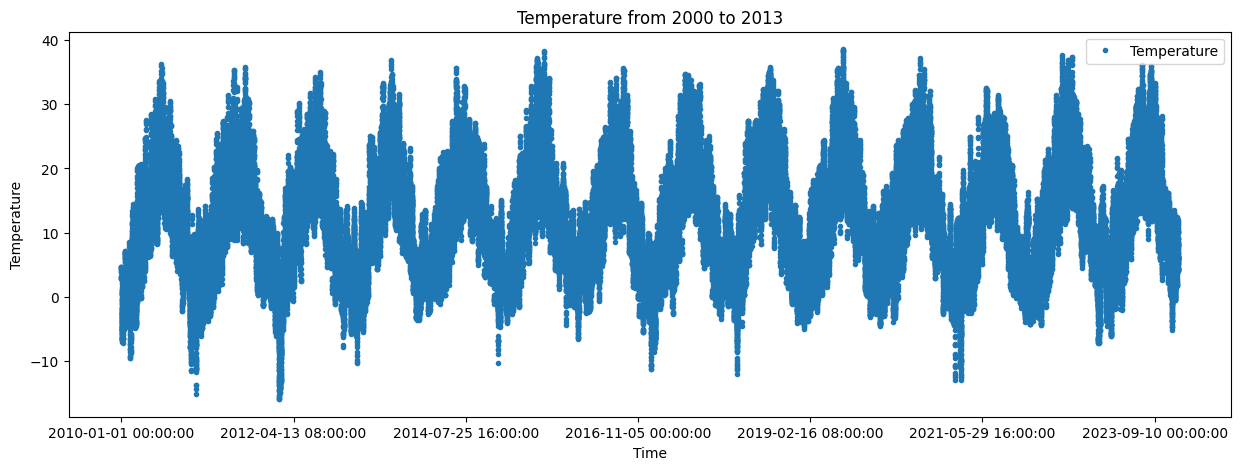

In [160]:
# Plotting the temperature
pre_df.plot(y='Temperature' ,style='.' , figsize=(15,5) , title='Temperature from 2000 to 2013' , xlabel='Time' , ylabel='Temperature')


# Visualising the data :

<Axes: title={'center': 'Temperature from 2000 to 2013'}, xlabel='Time', ylabel='Temperature'>

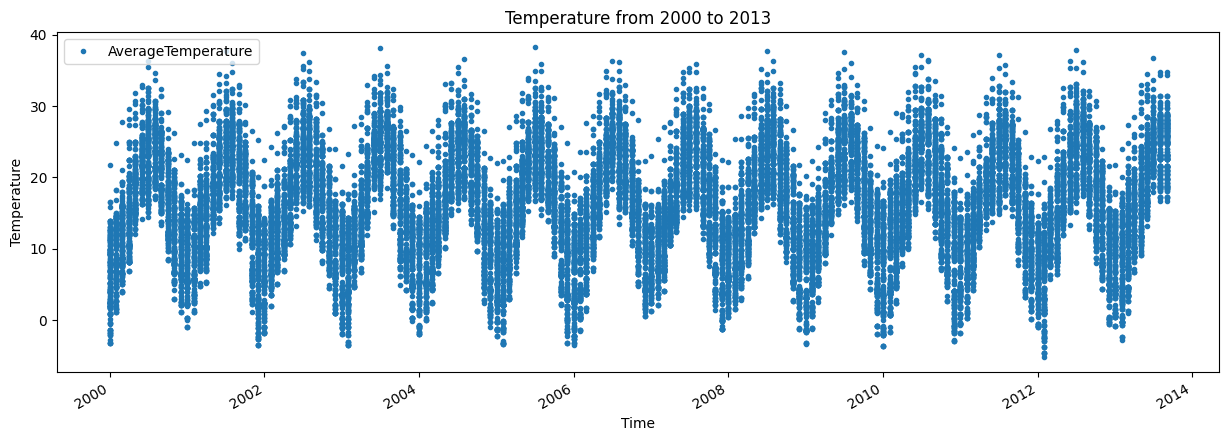

In [48]:
# Plotting the temperature
df.plot( y='AverageTemperature' ,style='.' , figsize=(15,5) , title='Temperature from 2000 to 2013' , xlabel='Time' , ylabel='Temperature')


<Axes: xlabel='month'>

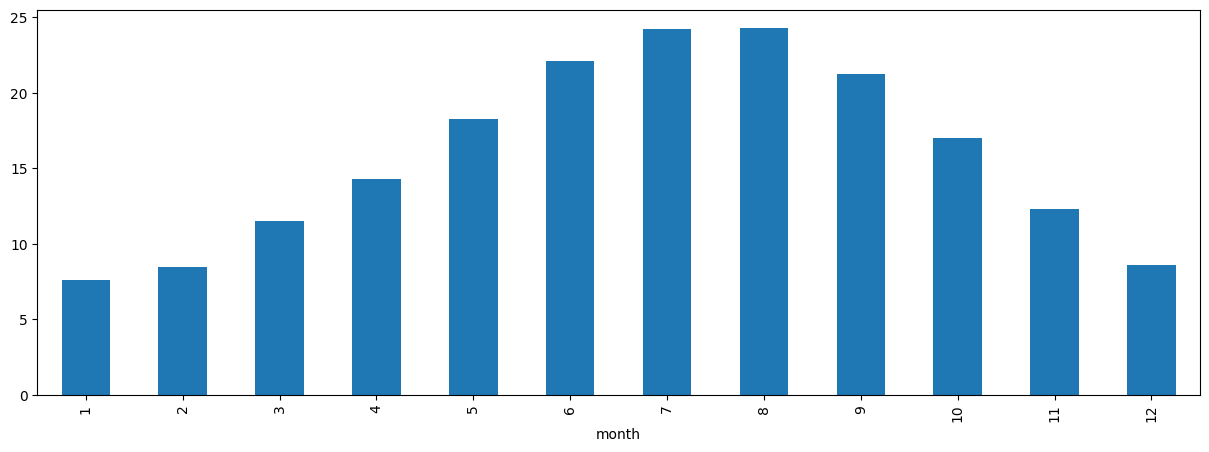

In [49]:
# Seasonal plot
df.groupby('month')['AverageTemperature'].mean().plot(kind='bar', figsize=(15,5))

/tmp/ipykernel_381451/1420218915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='AverageTemperature', data=df, ax=ax , palette='viridis' )


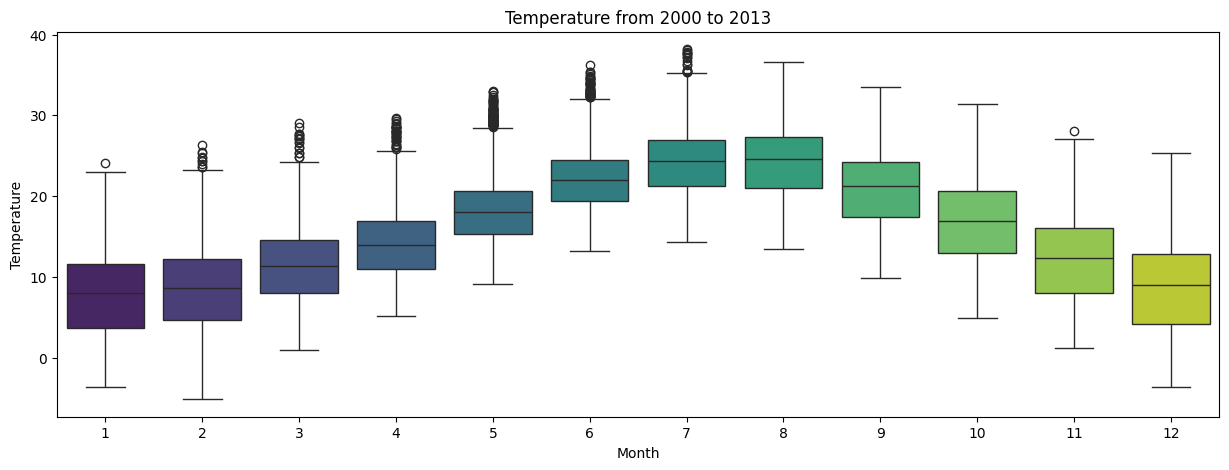

In [28]:
# Boxplot for each month
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='month', y='AverageTemperature', data=df, ax=ax , palette='viridis' )
ax.set_title('Temperature from 2000 to 2013')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
plt.show()


<Axes: xlabel='year', ylabel='month'>

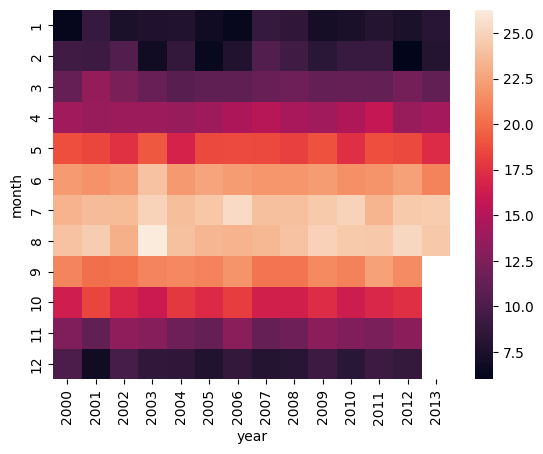

In [7]:
df['year'] = df['date'].dt.year
pivot_table = df.pivot_table(values='AverageTemperature', index='month', columns='year')
sns.heatmap(pivot_table)

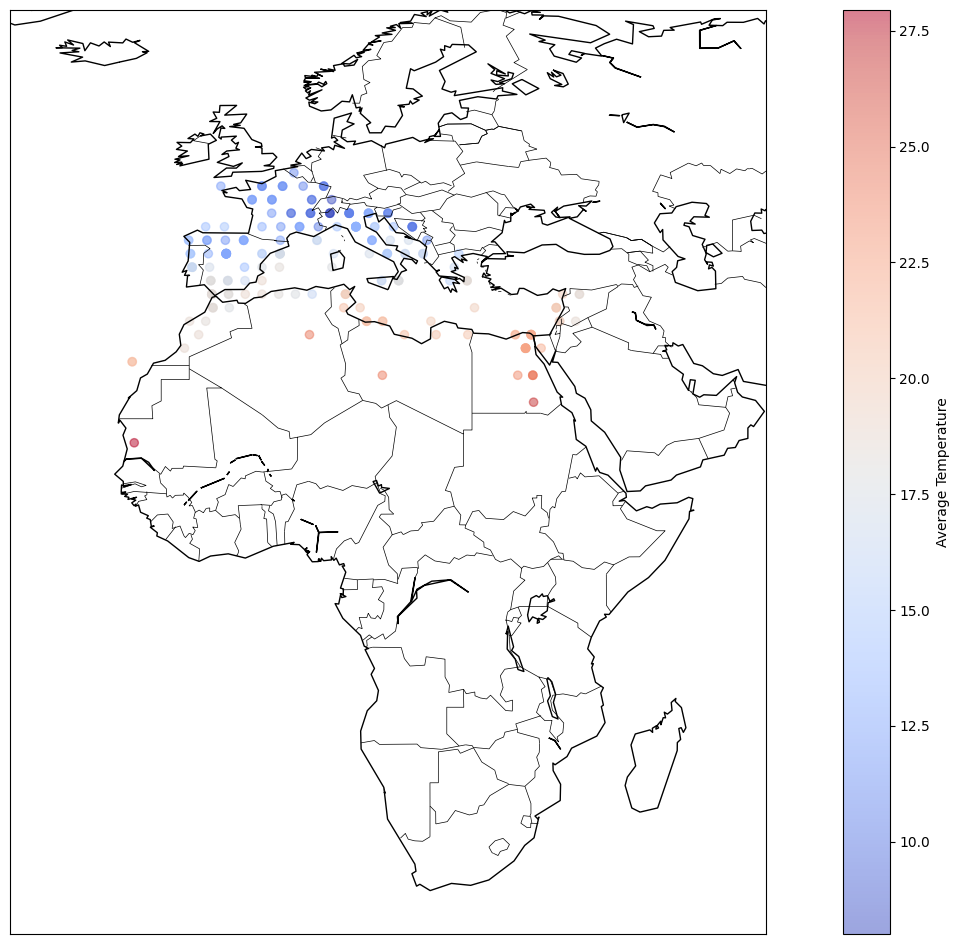

In [9]:
from mpl_toolkits.basemap import Basemap

# Calculate the average temperature for each city
city_temps = df.groupby('City')['AverageTemperature'].mean()

# Get the coordinates for each city
city_coordinates = df.groupby('City')[['Latitude', 'Longitude']].mean(numeric_only=True)

# Merge the coordinates with the temperature data
city_data = pd.merge(city_temps, city_coordinates, left_index=True, right_index=True)

# Create a new figure
fig = plt.figure(figsize=(20 , 12))

# Create a map
m = Basemap(projection='cyl' , llcrnrlat=-40 , urcrnrlat=70 , llcrnrlon=-30 , urcrnrlon=60)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Convert Latitude and Longitude into numeric values
city_data['Latitude'] = pd.to_numeric(city_data['Latitude'])
city_data['Longitude'] = pd.to_numeric(city_data['Longitude'])

# Convert Latitude and Longitude to map coordinates
x, y = m(city_data['Longitude'].values, city_data['Latitude'].values)

# Create a scatter plot on the map
sc = m.scatter(x, y, latlon=True, c=city_data['AverageTemperature'], cmap='coolwarm', alpha=0.5)

# Add a colorbar
plt.colorbar(sc, label='Average Temperature')

plt.show()


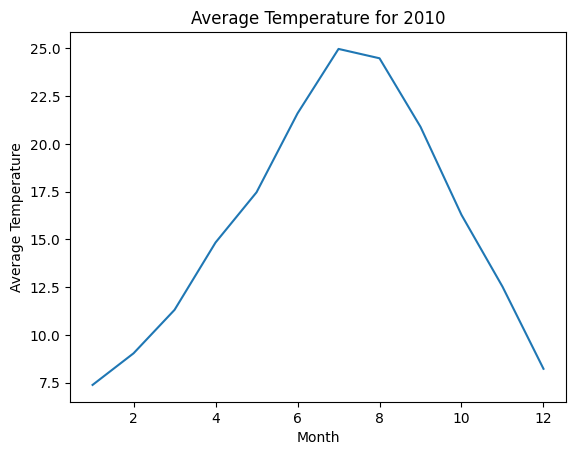

In [51]:
# Plot the average temperature for a specific year
df_year = df[df['year'] == 2010]

# Group by month and calculate the average temperature
df_year = df_year.groupby(df_year['month'])['AverageTemperature'].mean()

# Plot the results
df_year.plot(kind='line', title='Average Temperature for 2010')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()

In [19]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

# Spliting the data into training and test sets :


In [67]:
X1, y1 = df_to_X_y(df["AverageTemperature"], 5)
X1.shape, y1.shape
X1[0]

array([[ 7.468],
       [11.199],
       [12.242],
       [10.431],
       [15.149]])

In [52]:
X_train1, y_train1 = X1[:30000], y1[:30000]
X_val1, y_val1 = X1[30000:35000], y1[30000:35000]
X_test1, y_test1 = X1[35000:], y1[35000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((30000, 5, 1), (30000,), (5000, 5, 1), (5000,), (470, 5, 1), (470,))

# Creating Models :

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [55]:

model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
926/938 [============================>.] - ETA: 0s - loss: 171.3245 - root_mean_squared_error: 13.0891INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 16s 13ms/step - loss: 169.9621 - root_mean_squared_error: 13.0370 - val_loss: 61.3359 - val_root_mean_squared_error: 7.8317
Epoch 2/10
924/938 [============================>.] - ETA: 0s - loss: 37.8369 - root_mean_squared_error: 6.1512INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 37.5922 - root_mean_squared_error: 6.1312 - val_loss: 19.8819 - val_root_mean_squared_error: 4.4589
Epoch 3/10
933/938 [============================>.] - ETA: 0s - loss: 12.3967 - root_mean_squared_error: 3.5209INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 12.3966 - root_mean_squared_error: 3.5209 - val_loss: 9.3978 - val_root_mean_squared_error: 3.0656
Epoch 4/10
928/938 [============================>.] - ETA: 0s - loss: 7.6102 - root_mean_squared_error: 2.7587INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 7.6270 - root_mean_squared_error: 2.7617 - val_loss: 8.1723 - val_root_mean_squared_error: 2.8587
Epoch 5/10
930/938 [============================>.] - ETA: 0s - loss: 6.7712 - root_mean_squared_error: 2.6021INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 12s 12ms/step - loss: 6.7824 - root_mean_squared_error: 2.6043 - val_loss: 7.6203 - val_root_mean_squared_error: 2.7605
Epoch 6/10
925/938 [============================>.] - ETA: 0s - loss: 6.3597 - root_mean_squared_error: 2.5218INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 6.3376 - root_mean_squared_error: 2.5175 - val_loss: 7.2220 - val_root_mean_squared_error: 2.6874
Epoch 7/10
915/938 [============================>.] - ETA: 0s - loss: 5.9847 - root_mean_squared_error: 2.4464INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 7s 7ms/step - loss: 5.9725 - root_mean_squared_error: 2.4439 - val_loss: 6.8069 - val_root_mean_squared_error: 2.6090
Epoch 8/10
936/938 [============================>.] - ETA: 0s - loss: 5.7091 - root_mean_squared_error: 2.3894INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 5.7052 - root_mean_squared_error: 2.3886 - val_loss: 6.5105 - val_root_mean_squared_error: 2.5516
Epoch 9/10
936/938 [============================>.] - ETA: 0s - loss: 5.4987 - root_mean_squared_error: 2.3449INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 5.5199 - root_mean_squared_error: 2.3494 - val_loss: 6.3516 - val_root_mean_squared_error: 2.5202
Epoch 10/10
926/938 [============================>.] - ETA: 0s - loss: 5.3796 - root_mean_squared_error: 2.3194INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


938/938 [==============================] - 11s 12ms/step - loss: 5.3925 - root_mean_squared_error: 2.3222 - val_loss: 6.1651 - val_root_mean_squared_error: 2.4830


In [56]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [57]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

938/938 [==============================] - 2s 2ms/step


,Train Predictions,Actuals
0,16.926653,18.215
1,21.717058,18.530
2,20.134132,19.030
3,16.275440,17.636
4,15.285248,13.611
...,...,...
29995,18.767801,19.120
29996,21.688208,21.994
29997,24.433516,24.874
29998,26.206259,27.402


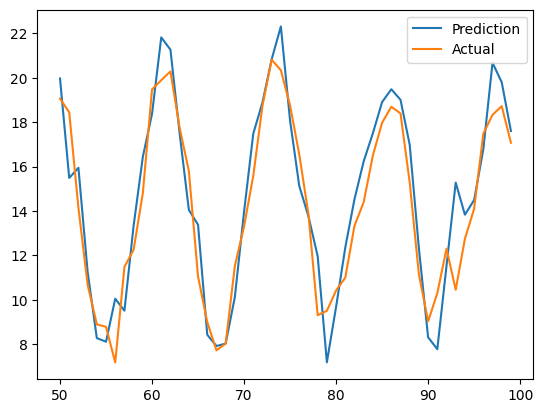

In [66]:
import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][50:100], label="Prediction")
plt.plot(train_results['Actuals'][50:100], label="Actual")
plt.legend()